In [2]:
import ROOT as r
import coffea
import coffea.hist as hist
from coffea.nanoevents.methods import vector
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

from pyjet import cluster
import awkward as ak

Welcome to JupyROOT 6.22/00


In [8]:
# events_raw = uproot.open("~/eos/llp/HNL/HeavyNeutralLepton_Tree.root")['MuonSystem']
# events_raw = uproot.open("~/eos/llp/ZToMuMu_NNPDF31_13TeV-powheg_M_6000_Inf/HeavyNeutralLepton_Tree.root")['MuonSystem']
# events_raw = uproot.open("../ggH_HToSSTodddd_v2/HeavyNeutralLepton_Tree_45_7_1000.root")['MuonSystem']

# events_raw = uproot.open("~/eos/llp/SingleMu_2017B/HeavyNeutralLepton_Tree.root")['MuonSystem']
# events_raw = uproot.open("~/eos/llp/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/HeavyNeutralLepton_Tree.root")['MuonSystem']
events_raw = uproot.open("~/eos/llp/WJetsToLNu/HeavyNeutralLepton_Tree_0.root")['MuonSystem']

df = coffea.processor.LazyDataFrame(events_raw,entrystop=1000)
start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
events = uproot.lazy(df._tree)
events = events[start:stop]

In [ ]:
# events = events[:2000]

isData = not(ak.any(events.gParticleE) or ak.any(events.gLepE))
print(isData)

In [46]:
ak.max(events.ctau)

1000

In [42]:
ct_old = 100
np.exp(ak.firsts(events.gLLP_ctau)*(1/100-1/10))

<Array [0.116, 1.99e-05, ... 0.114, 0.0592] type='1000 * ?float32'>

In [43]:
np.min(ak.firsts(events.gLLP_ctau))

0.0070493347

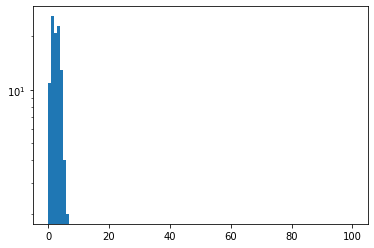

In [36]:
bins, h = np.histogram(np.array(ak.firsts(events.gLLP_ctau)),100,(0,100))
plt.hist(bins,h)
plt.yscale("log")

In [4]:
events.fields

['runNum',
 'lumiSec',
 'evtNum',
 'mH',
 'mX',
 'ctau',
 'ZCategory',
 'category',
 'npv',
 'npu',
 'weight',
 'higgsPtWeight',
 'higgsPtWeightSys',
 'scaleWeights',
 'lepOverallSF',
 'sf_facScaleUp',
 'sf_facScaleDown',
 'sf_renScaleUp',
 'sf_renScaleDown',
 'sf_facRenScaleUp',
 'sf_facRenScaleDown',
 'metSF',
 'pileupWeight',
 'pileupWeightUp',
 'pileupWeightDown',
 'Flag_HBHENoiseFilter',
 'Flag_BadPFMuonFilter',
 'Flag_HBHEIsoNoiseFilter',
 'Flag_CSCTightHaloFilter',
 'Flag_globalSuperTightHalo2016Filter',
 'Flag_goodVertices',
 'Flag_ecalBadCalibFilter',
 'Flag_BadChargedCandidateFilter',
 'Flag_eeBadScFilter',
 'Flag_all',
 'Flag2_HBHENoiseFilter',
 'Flag2_HBHEIsoNoiseFilter',
 'Flag2_BadPFMuonFilter',
 'Flag2_globalSuperTightHalo2016Filter',
 'Flag2_globalTightHalo2016Filter',
 'Flag2_BadChargedCandidateFilter',
 'Flag2_EcalDeadCellTriggerPrimitiveFilter',
 'Flag2_ecalBadCalibFilter',
 'Flag2_eeBadScFilter',
 'Flag2_all',
 'EE_prefiring',
 'rho',
 'met',
 'metNoMu',
 'metPhi',


In [6]:
events[events.SingleLepTrigger==True]

<Array [{runNum: 1, lumiSec: 2, ... ] type='221 * {"runNum": uint32, "lumiSec": ...'>

In [4]:
np.where(events.nCscRechitClusters3>0)

(<Array [15, 31, 37, 162, ... 734, 773, 774] type='29 * int64'>,)

In [7]:
lep=ak.zip({
    'pt':events.lepPt ,
    'eta':events.lepEta,
    'phi':events.lepPhi,
    'energy':events.lepE,
    'pdgid':events.lepPdgId,
},with_name='PtEtaPhiELorentzVector',
behavior=vector.behavior    
)  

In [8]:
ele   = lep[abs(lep.pdgid)==11]
muons = lep[abs(lep.pdgid)==13]

In [29]:
events.metXYCorr>

<Array [13.7, 70.5, 43.4, ... 196, 32.7, 22.4] type='1000 * float32'>

In [26]:
np.where(ak.num((ele.pt>35) & (abs(ele.eta)<2.4),axis=1)==1)

(<Array [48, 57, 62, 98, ... 924, 945, 947, 955] type='63 * int64'>,)

In [19]:
ak.num(ele.pt>25,axis=1)>0

<Array [False, False, False, ... False, False] type='1000 * bool'>

In [23]:
events.jetMet_dPhi

<Array [-999, -999, -1.29, ... -999, -999] type='2000 * float32'>

In [3]:
events.nCscRechits

<Array [30, 117, 77, 64, ... 75, 62, 57, 54] type='1000 * int32'>

In [5]:
llp_csc = ak.any(events.gLLP_csc,axis=1)
print("LLP decay inside CSC = ",ak.sum(llp_csc))
print("Total events = ",len(events))
print("Fraction of events inside CSC = ",np.round(ak.sum(llp_csc)/len(events),3))

LLP decay inside CSC =  0
Total events =  1000
Fraction of events inside CSC =  0.0


In [24]:
ak.any(events.gLLP_csc)

False

In [13]:

llp=ak.zip({
    'pt':events.gLLP_pt,
    'EMfrac':events.gLLP_EMFracE,
    'e':events.gLLP_e,
    'z':events.gLLP_decay_vertex_z,
    'y':events.gLLP_decay_vertex_y,
    'x':events.gLLP_decay_vertex_x,    
    'r':events.gLLP_decay_vertex_r,
}      
)  

llp = llp[llp.e>0]

In [14]:
ak.any(llp)

True

In [19]:
# llp_csc = ak.any(events.gLLP_csc,axis=1)
# events = events[(llp_csc==1)]

llp=ak.zip({
    'pt':events.gLLP_pt,
    'EMfrac':events.gLLP_EMFracE,
    'e':events.gLLP_e,
    'z':events.gLLP_decay_vertex_z,
    'y':events.gLLP_decay_vertex_y,
    'x':events.gLLP_decay_vertex_x,    
    'r':events.gLLP_decay_vertex_r,
}      
)  

llp = llp[llp.e>0]

lep=ak.zip({
    'pt':events.lepPt ,
    'eta':events.lepEta,
    'phi':events.lepPhi,
    'energy':events.lepE,
},with_name='PtEtaPhiELorentzVector',
behavior=vector.behavior    
)  

cluster= ak.zip(
    {
        "n":events.nCscRechitClusters3,
        "time":events.cscRechitCluster3Time,
        'size':events.cscRechitCluster3Size,
        "timeSpread":events.cscRechitCluster3TimeSpread,
        "eta":events.cscRechitCluster3Eta,
        "phi":events.cscRechitCluster3Phi,        
        "x":events.cscRechitCluster3X,
        "y":events.cscRechitCluster3Y,
        "z":events.cscRechitCluster3Z,   
        'llp_x':events.cscRechitCluster3_match_gLLP_decay_x,
        'llp_y':events.cscRechitCluster3_match_gLLP_decay_y,
        'llp_z':events.cscRechitCluster3_match_gLLP_decay_z,        
        "NChamber":events.cscRechitCluster3NChamber,
        "MaxChamber":events.cscRechitCluster3MaxChamber,
        "MaxStation":events.cscRechitCluster3MaxStation,
        'ME11ratio':events.cscRechitCluster3Me11Ratio,
        'ME12ratio':events.cscRechitCluster3Me12Ratio,        
        'match_MB1Seg_0p4':events.cscRechitCluster3_match_MB1Seg_0p4,
        'match_RE12_0p4':events.cscRechitCluster3_match_RE12_0p4,        
        'match_RB1_0p4':events.cscRechitCluster3_match_RB1_0p4,                
        "NStation10":events.cscRechitCluster3NStation10,
        "AvgStation10":events.cscRechitCluster3AvgStation10,
        "llp_match":events.cscRechitCluster3_match_gLLP,
        "dphi_cluster_MET":events.cscRechitCluster3MetXYCorr_dPhi,
    }
)

cluster_dir= ak.zip(
    {
        'pt':ak.ones_like(events.cscRechitCluster3Eta),
        "eta":events.cscRechitCluster3Eta,
        "phi":events.cscRechitCluster3Phi,
        'mass':ak.zeros_like(events.cscRechitCluster3Eta)
    },with_name="PtEtaPhiMLorentzVector",
    behavior=vector.behavior
)


muVeto=ak.zip({
    'e':events.cscRechitCluster3MuonVetoE,
    'pt':events.cscRechitCluster3MuonVetoPt,
    'phi':events.cscRechitCluster3MuonVetoPhi,
    'eta':events.cscRechitCluster3MuonVetoEta,
    'LooseIso':events.cscRechitCluster3MuonVetoLooseIso,
    'LooseId':events.cscRechitCluster3MuonVetoLooseId,    
    'TightId':events.cscRechitCluster3MuonVetoTightId,
})      

jetVeto=ak.zip({
    'e':events.cscRechitCluster3JetVetoE,
    'pt':events.cscRechitCluster3JetVetoPt,
    'phi':events.cscRechitCluster3JetVetoPhi,
    'eta':events.cscRechitCluster3JetVetoEta,
})      

In [32]:
cluster.ME11_ME12=(cluster.ME12ratio+cluster.ME11ratio)*(cluster.size)

In [33]:
print(cluster.size[727])
print(cluster.ME11ratio[727],cluster.ME11ratio[727]*cluster.size[727])
print(cluster.ME12ratio[727],cluster.ME12ratio[727]*cluster.size[727])
print(cluster.ME11_ME12[727])


[68, 57]
[1, 0] [68, 0]
[0, 0.0702] [0, 4]
[68, 4]


In [38]:
c1 = cluster[cluster.ME11_ME12>0]

In [36]:
c1[events.metXYCorr>30]

<Array [[], [], [], [], ... [], [], [], []] type='622 * var * {"n": int32, "time...'>

In [43]:
cluster.ME11ratio[727]

<Array [1, 0] type='2 * float32'>

In [34]:
cluster.eta[727]

<Array [-2.19, 1.33] type='2 * float32'>

In [55]:
abs(muVeto.eta)[727]

<Array [2.24, 1.32] type='2 * float32'>

In [9]:
np.where(events.nCscRechitClusters3>1)

(<Array [665, 727] type='2 * int64'>,)

In [17]:
cluster.time>0

<Array [-51.8, -1.17] type='2 * float32'>

In [61]:
~(muVeto.pt>10)[727]

<Array [True, False] type='2 * bool'>

In [67]:
cluster.time[727]

<Array [-51.8, -1.17] type='2 * float32'>

In [69]:
ak.num(cluster[cluster.time<-10],axis=1)[727]

1

In [44]:
ak.flatten(ak.values_astype(muVeto.LooseIso[cluster.time<0],np.int))

<Array [0, 1, 0, 0, 0, 1, ... 0, 0, 1, 0, 0, 1] type='21 * int64'>

In [55]:
muVeto[cluster.time>0].LooseIso[36]

<Array [False] type='1 * bool'>

In [54]:
muVeto.LooseIso[36]

<Array [False] type='1 * bool'>

In [8]:
# # a = ak.flatten(llp.z[ak.any(ClusterID,axis=1)])
# <Array [908, -694, 859, ... -1.07e+03, -974] type='15 * float32'>
# b = ak.flatten(llp.z)
# <Array [621, 908, -721, ... -1.07e+03, -974] type='63 * float32'>
# ak.flatten(ak.fill_none(ak.mask(llp.z,ak.any(ClusterID,axis=1)),[0]))
# <Array [0, 908, 0, 0, ... 0, -1.07e+03, -974] type='63 * float64'>

def maskAndFill(denom,selection,value):
    numer = ak.mask(denom,selection)
    numer = ak.fill_none(numer, value) #fill none with same structure
    return ak.flatten(numer)


numer = maskAndFill(llp.e,ak.any(cluster.llp_match,axis=1),len(llp.e[0])*[0])
selection=ak.values_astype(numer>0,np.int)

h = hist.Hist("Events", hist.Bin("selection", "pass/fail", 2, 0, 2),
            hist.Bin("denom", "z", 50, 500, 1100)
         )
h.fill(selection=ak.values_astype(numer>0,np.int),
       denom=ak.flatten(llp.z)
)
h.project('selection').values()

ValueError: in IrregularlyPartitionedArray attempting to get 0, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.1.2/src/libawkward/partition/PartitionedArray.cpp#L97)

In [165]:
cluster.llp_match[3]

<Array [] type='0 * bool'>

In [164]:
np.where(ak.any(cluster.llp_match,axis=1))

(array([  0,   1,   2,   4,   5,   8,   9,  10,  11,  12,  14,  16,  17,
         19,  20,  21,  22,  23,  24,  26,  27,  29,  31,  33,  34,  35,
         36,  37,  40,  41,  43,  45,  46,  47,  49,  50,  52,  54,  56,
         57,  58,  59,  60,  62,  63,  64,  65,  66,  68,  69,  70,  72,
         73,  74,  75,  76,  77,  79,  80,  81,  83,  84,  86,  89,  92,
         93,  94,  96,  97,  99, 100, 101, 103, 105, 107, 108, 110, 111,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 129,
        130, 131, 133, 136, 140, 141, 142, 144, 145, 146, 148, 149, 150,
        151, 154, 156, 157, 159, 161, 162, 163, 164, 166, 167, 169, 170,
        173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 187,
        188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202,
        203, 204, 206, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218,
        220, 221, 223, 224, 228, 230, 233, 234, 236, 237, 241, 242, 244,
        245, 246, 249, 250, 251, 253, 254, 255, 258

In [170]:
ak.fill_none(ak.mask(llp.e,ak.any(cluster.llp_match,axis=1)),[0]*2)

<Array [[47.1, 97.4], [133, ... [167, 57.6]] type='284 * var * float64'>

<Array [(47.1, 0), (97.4, 0)] type='2 * (float32, int64)'>

In [100]:
ak.sum(numer==0)+ak.sum(numer>0)

4416

In [101]:
ak.sum(numer>0)

2180

In [102]:
ak.sum(numer==0)

2236

In [40]:
ak.max(events.gLLP_decay_vertex_z)

1099.588

In [41]:
llp.z

<Array [[621], [908], ... [1.08e+03], [-571]] type='4416 * option[var * float32]'>

In [114]:
ak.any(cluster.n>1,axis=1)
llp.z[ak.any(cluster.n>1,axis=1)]

<Array [[-694], [924], [-974]] type='3 * option[var * float32]'>

In [116]:
cluster.NChamber>1

<Array [[True], [True], ... [True, True]] type='63 * option[var * bool]'>

In [198]:
abs(cluster.eta)<1.9

<Array [[True], [False], ... [True, False]] type='63 * option[var * bool]'>

In [208]:
clusterID=((cluster.NStation10>1) & (abs(cluster.eta)<1.9))|\
((cluster.NStation10==1) &(abs(cluster.AvgStation10)==4) & (abs(cluster.eta)<1.8))|\
((cluster.NStation10==1) &(abs(cluster.AvgStation10)==3) & (abs(cluster.eta)<1.6))|\
((cluster.NStation10==1) &(abs(cluster.AvgStation10)==2) & (abs(cluster.eta)<1.6))

In [228]:
clusterVeto= ((cluster.NRechitChamberPlus11<=0)&(cluster.NRechitChamberPlus12<=0)&\
              (cluster.NRechitChamberMinus11<=0)&(cluster.NRechitChamberMinus12<=0)&\
              (cluster.match_MB1Seg_0p4<=0)&(cluster.match_RE12_0p4<=0)&\
              (cluster.match_RB1_0p4<=0)
             )

In [44]:
ak.any(cluster.llp_match,axis=1)

<Array [True, True, False, ... False, False] type='4416 * ?bool'>

In [239]:
ak.sum(ClusterID)

15

In [237]:
ak.sum(ak.Array([[True,True],[False,True]]))

3

In [210]:
ClusterID= ((cluster.AvgStation10>2)&(cluster.NChamber>1))
ak.flatten(llp.z[ak.any(ClusterID,axis=1)])

<Array [908, -694, 859, ... -1.07e+03, -974] type='15 * float32'>

In [213]:
llp.z

<Array [[621], [908], ... [-1.07e+03], [-974]] type='63 * option[var * float32]'>

In [ ]:
events.gLLP_EMFracE

In [214]:
ak.values_astype(llp.z[ak.any(ClusterID,axis=1)],np.int)

<Array [[907], [-693], ... [-1074], [-973]] type='15 * option[var * int64]'>

In [50]:
numer>0

<Array [True, True, False, ... False, False] type='4416 * bool'>

<Array [1, 1, 0, 1, 0, 0, ... 1, 0, 0, 1, 0, 0] type='4416 * int64'>

In [53]:
ak.flatten(llp.z)

<Array [621, 908, -721, ... 1.08e+03, -571] type='4416 * float32'>

In [65]:
h.values()

{(): array([[57., 66., 54., 61., 72., 60., 70., 70., 50., 56., 48., 46., 54.,
         52., 61., 52., 21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [22., 30., 20., 17., 16., 17., 20., 14.,  9., 12., 11., 14.,  7.,
          1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])}

{(): array([950., 213.])}

In [12]:
events.gLLP_pt[events.gLLP_csc==1]

<Array [33.4, 34.4, 29.6, ... 34.5, 3.49, 23.3] type='63 * float32'>

In [13]:
events.gLLP_lepdPhi

<Array [[3.09, 2.59], ... [-3.03, 1.37]] type='63 * 2 * float32'>

In [22]:
events.gLLP_decay_vertex_z!=-666

<Array [[True, False], ... [True, False]] type='63 * 2 * bool'>

In [6]:
ak.flatten(ak.values_astype(~cluster.llp_match,np.int))

<Array [0, 0, 0, 0, 1, 0, ... 0, 0, 0, 1, 0, 1] type='41 * int64'>

In [35]:
events.lepPt

<Array [[], [42.9], [], [], ... [], [], [], []] type='1000 * var * float32'>

In [22]:
ak.flatten(cluster.n)

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='44 * int32'>

In [20]:
cls_lep_pair = ak.cartesian({"cls":cluster_dir,'lep':lep},axis=1,nested=True)

dphi_lep_cls = cls_lep_pair.cls.delta_phi(cls_lep_pair.lep)

In [29]:
ak.flatten(dphi_lep_cls)

<Array [[], [], [], ... [-0.0928], []] type='44 * var * float32'>

In [30]:
ak.to_numpy(cluster_dir[cluster.llp_match][10])

array([(1., 1.5951381, 0.12471689, 0.)],
      dtype=[('pt', '<f4'), ('eta', '<f4'), ('phi', '<f4'), ('mass', '<f4')])

In [96]:
llp=llp[llp.e>0]
ak.flatten(llp.z[ak.num(cluster)>1])

<Array [-694, 924, -974] type='3 * float32'>

In [97]:
ak.flatten(llp.z)

<Array [621, 908, -721, ... -1.07e+03, -974] type='63 * float32'>

In [51]:
np.where(ak.num(cluster)>1)

(array([ 6, 10, 62]),)

1

In [56]:
llp.r[62]

<Array [407, 942] type='2 * float32'>

In [22]:
np.where(ak.num(cluster)>1)

(array([ 6, 10, 62]),)

In [154]:
ak.flatten(ak.values_astype(cluster.llp_match,np.int))

<Array [1, 1, 1, 1, 0, 1, ... 1, 1, 1, 1, 1, 1] type='1091 * int64'>

In [160]:
ak.fill_none(ak.flatten(dphi_lep_cls),-600)

<Array [[], [], [2.84], ... [], [], [-3.01]] type='1091 * union[var * float32, i...'>

In [163]:
ak.flatten(dphi_lep_cls[~cluster.llp_match],axis=None)

<Array [-0.314, -0.411, -1.78, ... -1.8, 0.296] type='9 * float32'>

In [164]:
ak.flatten(dphi_lep_cls[cluster.llp_match],axis=None)

<Array [2.84, 3.08, -3.12, ... 3.01, -3.01] type='179 * float32'>

In [166]:
ak.flatten(dphi_lep_cls[~cluster.llp_match],axis=None)
ak.zeros_like(ak.flatten(dphi_lep_cls[cluster.llp_match],axis=None))

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='179 * float32'>

In [87]:
ak.to_numpy(ak.flatten(dphi_lep_cls,axis=None))

array([ 2.8449643 ,  3.0809057 , -3.1249049 , -0.31369328, -3.1015875 ,
       -2.8946662 , -2.731911  ,  3.0177443 ], dtype=float32)

### Computing distance between cluster position and decay position

In [33]:
ak.min(events.cscRechitCluster3Size)

51

In [20]:
cls_matched = cluster[cluster.llp_match]

In [26]:
cls_matched.decay_length=((cls_matched.z-cls_matched.llp_z)**2+(cls_matched.y-cls_matched.llp_y)**2+((cls_matched.x-cls_matched.llp_x))**2)**0.5

In [15]:
llp.x

<Array [[236], [157], ... [-144], [-121]] type='63 * option[var * float32]'>

In [36]:
ak.max(cls_matched.decay_length)

179.90308

In [37]:
cls_matched.decay_length

<Array [[88.5], [70.5], ... [], [62.5]] type='63 * option[var * float32]'>

### Test Filling integers

In [3]:
h =hist.Hist("Events",hist.Bin("nCluster", "nCluster", 4, 0, 4))

<AxesSubplot:xlabel='nCluster', ylabel='Events'>

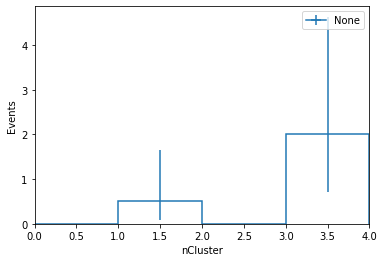

In [5]:
a=np.array([1,1,1,1,0,3,4])
w=np.array([0,0,0,0.5,0,1,1])
h.fill(nCluster=a,weight=w)
hist.plot1d(h,density=False)

In [6]:
h.values(overflow="all")

{(): array([0., 2., 8., 0., 2., 1.])}

### Test filling flatten

In [3]:
events_raw = uproot.open("~/eos/llp/WJetsToLNu/HeavyNeutralLepton_Tree_0.root")['MuonSystem']
df = coffea.processor.LazyDataFrame(events_raw)
events_WJ = uproot.lazy(df._tree)

In [4]:
events_raw = uproot.open("~/eos/llp/SingleMu_2017B/HeavyNeutralLepton_Tree_0.root")['MuonSystem']
df = coffea.processor.LazyDataFrame(events_raw)
events_data = uproot.lazy(df._tree)

In [5]:
len(events_WJ)

449451

In [33]:
print("lumi = 39.19 /pb")
print("xsec = 56000")
print('nEvt = ',ak.sum(events_WJ.weight))
w = 39.19 * 52940*0.1/ak.sum(events_WJ.weight)
print("weight = ",w )

lumi = 39.19 /pb
xsec = 56000
nEvt =  449065.3
weight =  0.46200820732507586


In [10]:
h = hist.Hist("Events",hist.Cat("dataset", "Dataset"),                
                hist.Bin("nCscRechits", "nCscRechits", 50, 0, 1000),
            )

In [11]:
h.fill(dataset="WJ",nCscRechits=events_WJ.nCscRechits,weight=events_WJ.weight)

In [17]:
h.fill(dataset="singleMu",nCscRechits=events_data.nCscRechits)

In [34]:
hplot = h.copy()
hplot.scale({"WJ": w}, "dataset")    

<AxesSubplot:xlabel='nCscRechits', ylabel='Events'>

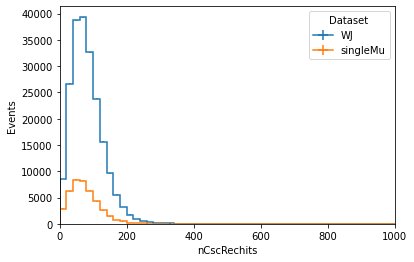

In [35]:
hist.plot1d(hplot,overlay='dataset',density=False,clear=False)

### Test cutflow

In [5]:
def normalize(val, cut):
    if cut is None:
        ar = ak.to_numpy(ak.fill_none(val, np.nan))
        return ar
    else:
        ar = ak.to_numpy(ak.fill_none(val[cut], np.nan))
        return ar

In [6]:
h = hist.Hist("Events",hist.Cat("dataset", "Dataset"),                
                hist.Bin("cut", "cut index", 3, 0, 3),
            )

In [3]:
from coffea.analysis_tools import Weights, PackedSelection

In [14]:
lep=ak.zip({
    'pt':events.lepPt ,
    'eta':events.lepEta,
    'phi':events.lepPhi,
    'energy':events.lepE,
},with_name='PtEtaPhiELorentzVector',
behavior=vector.behavior    
)  

In [15]:
leadinglep = ak.firsts(lep)

In [17]:
lepSel = PackedSelection()

lepSel.add('lep',leadinglep.pt>40)

In [11]:
selection = PackedSelection()
selection.add('Trigger',events.SingleEleTrigger==True)
selection.add('lep',events.lepPt>40)

ValueError: Expected an array of type N * primitive or N * ?primitive, received: 1000 * var * bool

In [10]:
cuts = [
    abs(cluster.eta)<1.9
]

In [10]:
selection.all()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
cluster[np.where(events.nCscRechitClusters3>1)].eta

<Array [[-2.34, -1.53], [-2.19, 1.33]] type='2 * var * float32'>

In [30]:
ak.fill_none(cluster[cut],np.nan)

<Array [[{n: 2, ... dphi_cluster_MET: 2.38}]] type='2 * var * {"n": int32, "time...'>

In [15]:
ak.flatten(cluster[cluster.eta<1.9].size)

<Array [58, 76, 55, 62, ... 55, 111, 53, 73] type='28 * int32'>